<a href="https://colab.research.google.com/github/jincy-lorance/codewithkaggle/blob/main/SMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# sklearn.naive_bayes import MultinomialNB
#[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
#[nltk_data]   Package stopwords is already up-to-date!
#[nltk_data] Downloading package punkt to /usr/share/nltk_data...
#[nltk_data]   Package punkt is already up-to-date!

import io
from google.colab import files
uploaded = files.upload()

import os.path
%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Saving sms_spam.csv to sms_spam.csv


In [ ]:
#train_df = pd.read_csv("../input/email-spam-ham-prediction/sms_spam.csv", encoding="ISO-8859-1", engine="python")
train_df = pd.read_csv(io.BytesIO(uploaded['sms_spam.csv']))
train_df.head()


,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
train_df.tail()

,type,text
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


In [ ]:
train_df.shape

(5574, 2)

Exploratory Data Analysis

Comparison of count & unique values for ham and spam

In [ ]:
train_df.rename(columns= {'type':'class','text':'messages'}, inplace=True)

      messages                                                               
         count unique                                                top freq
class                                                                        
ham       4827   4518                             Sorry, I'll call later   30
spam       747    642  Please call our customer service representativ...    4


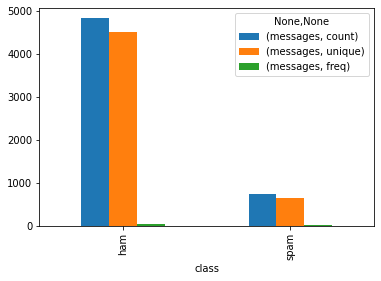

In [ ]:
print(train_df.groupby('class').describe())
train_df.groupby('class').describe().plot(kind='bar')


Displaying the top 20 message count

                                                index  Count
0                              Sorry, I'll call later     30
1   I cant pick the phone right now. Pls send a me...     12
2                                               Ok...     10
3                                                  Ok      4
4                                                 Ok.      4
5   Please call our customer service representativ...      4
6   7 wonders in My WORLD 7th You 6th Ur style 5th...      4
7   Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...      4
8   Your opinion about me? 1. Over 2. Jada 3. Kusr...      4
9                                                Okie      4
10  Wen ur lovable bcums angry wid u, dnt take it ...      4
11                           Convey my regards to him      3
12  As I entered my cabin my PA said, '' Happy B'd...      3
13  House-Maid is the murderer, coz the man was mu...      3
14                       Love you aathi..love u lot..      3
15             No messag

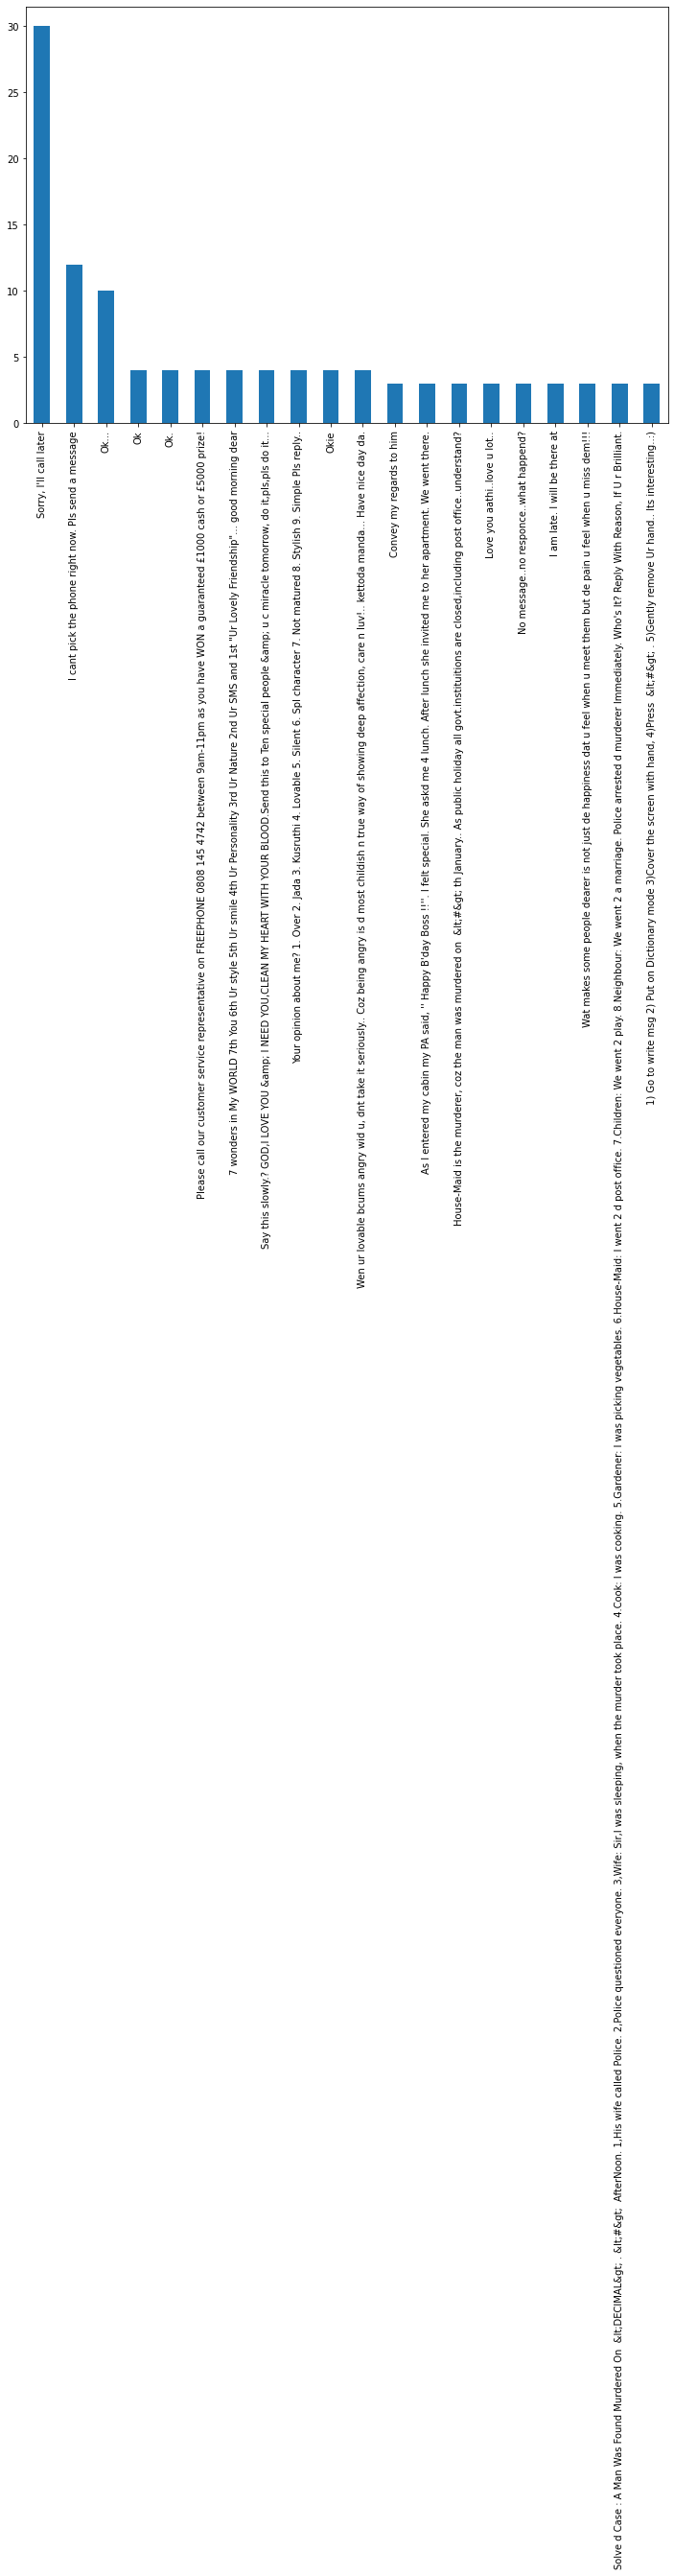

In [ ]:
plt.figure(figsize=(12,8))
train_df['messages'].value_counts().head(20).plot(kind='bar')
print(train_df['messages'].value_counts().to_frame('Count').head(20).reset_index())